### Load the Data 

In [19]:
import pandas as pd

EmpData = pd.read_csv('Salary Data.csv')

### Explore the data

In [20]:
EmpData.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### Check the NAN values |

In [21]:
print('NAN values that are in this data: ', EmpData.isnull().sum())

NAN values that are in this data:  Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


### Handle Unkown Values

#### For continuous Data


In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
EmpData[['Age','Years of Experience','Salary']] = imputer.fit_transform(EmpData[['Age','Years of Experience','Salary']])

#### For Catagorical Data

In [8]:
imputer_cat = SimpleImputer(strategy='most_frequent')
EmpData[['Gender', 'Education Level', 'Job Title']] = imputer_cat.fit_transform(EmpData[['Gender', 'Education Level', 'Job Title']])
print(EmpData.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


### Split the Data And Make the machine learning Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = EmpData[['Years of Experience']]
Y = EmpData[['Salary']]

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

### Visualize the Predicted Model

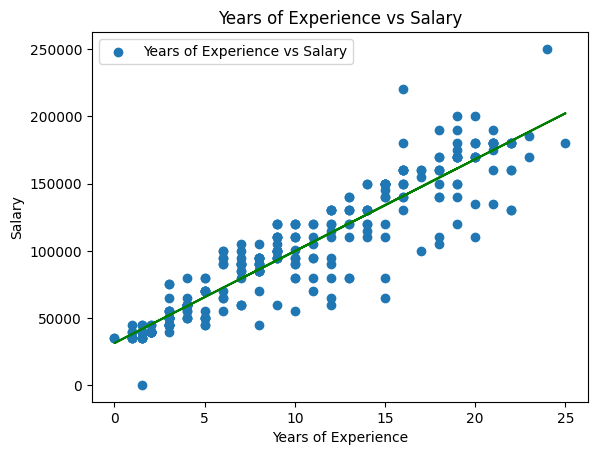

In [32]:
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, label='Years of Experience vs Salary')
plt.plot(X_train['Years of Experience'], model.predict(X_train), color='green')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.legend()
plt.show()


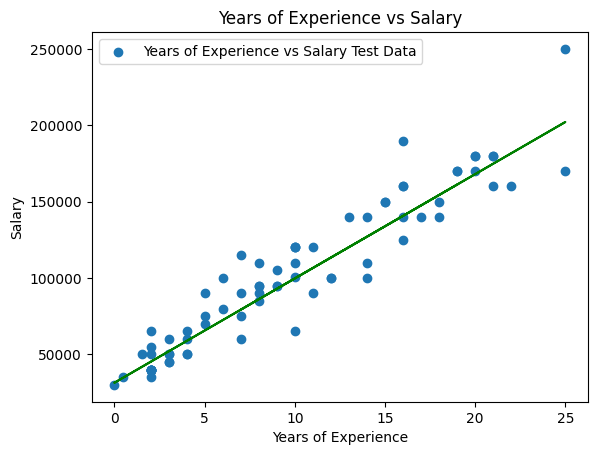

In [33]:
plt.scatter(x_test, y_test, label='Years of Experience vs Salary Test Data')
plt.plot(X_train['Years of Experience'], model.predict(X_train), color='green')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.legend()
plt.show()

### Finding the Model Score

In [35]:
print("Model Score on the TRAIN data: ", model.score(X_train,Y_train))
print("Model Score on the TEST data: ", model.score(x_test,y_test))


Model Score on the TRAIN data:  0.8575194096364807
Model Score on the TEST data:  0.8947512075775289


In [36]:
print("Maximum Year EXP: ", EmpData[['Years of Experience']].max())

Maximum Year EXP:  Years of Experience    25.0
dtype: float64


## Prediction On the Unkown Values

In [49]:
import pandas as pd

predicted_val = model.predict([[30],[35],[40],[45],[50]])

predicted_df = pd.DataFrame(predicted_val, columns=['Predicted Salary'])

predicted_df.index.name = 'ID'

predicted_df.to_csv('Predicted_Salary.csv')

print(predicted_df)

print(end="\n")
print(end="\n")
print(end="\n")
print(end="\n")

    Predicted Salary
ID                  
0      236298.413716
1      270441.408527
2      304584.403339
3      338727.398150
4      372870.392961






C:\Users\ABDULLAH\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
